# Data Wrangling and basic plotting

In this tutorial we'll take a look at the module ```pandas```  which is indispensible for working with tabular data (e.g. xlxs, csv). 

**Resources**
[Pandas Documentation](https://pandas.pydata.org/docs/)

[Python Data Science Handbook - Jake Vanderplas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) 🌟🌟🌟🌟🌟

[Todays data](https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv)

[A collection of Jpyter notebook ebooks](https://nbviewer.jupyter.org/)

[Google Dorks Cheatshee](https://www.sans.org/security-resources/GoogleCheatSheet.pdf)

Today we'll look at some Covid-19 data



In [0]:
import pandas as pd 
#give pandas as shorter handle (optional)


df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')
# the read_csv function can read data via a url like above, or from a filepath.
# must be a string, so remember your quote marks!
# df is short for DataFrame, which is a core pandas object
df.head() # firts couple of rows

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [0]:
df.describe() # quickly get info on the data
# In this 

,Confirmed,Recovered,Deaths
count,2.000900e+04,20009.000000,20009.000000
mean,4.936414e+03,1377.999350,325.218252
std,3.911299e+04,9241.404398,2705.461879
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,7.000000e+00,0.000000,0.000000
75%,3.280000e+02,31.000000,6.000000
max,1.257023e+06,195036.000000,75662.000000


In [0]:
df.shape # quickly find the size

(20009, 5)

In [0]:
# Ways to select columns

print(df.columns) # what are the columns called?

df['Date'] # also valid: df.loc[:,'Date'], where .loc is the locate function, : is all rows, 'Date' is the column header
# and df.iloc[:,0] - which selects data based on position, can be less reliable than using the column name
# Selecting an individual column returns a 'Series' object, which

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')


0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
20004    2020-05-07
20005    2020-05-07
20006    2020-05-07
20007    2020-05-07
20008    2020-05-07
Name: Date, Length: 20009, dtype: object

In [0]:
# Operations
df['Date'].unique() 
# There are a lot of repeats of the date, so let's see each unique date

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [0]:
confirmed = df.pivot(index = 'Country', columns = 'Date', values = 'Confirmed')
confirmed.head()

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36


## Plotting

I want to plot the ```confirmed``` dataframe as a line plot. To do that, I'll use a plotting library called ```matplotlib.pyplot``` from Matworks. 

[matplotlib.pyplot Documentation](https://matplotlib.org/api/pyplot_api.html)

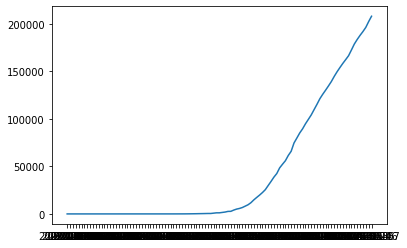

In [0]:
import matplotlib.pyplot as plt # another short handle

# Let's start with a single line
uk_cases = confirmed.loc['United Kingdom',:] # row = 'United Kingdom', columns = : (all)

plt.plot(uk_cases) # plt.plot for line plots 
plt.show() # render
# horrid!
# We can do better than this!

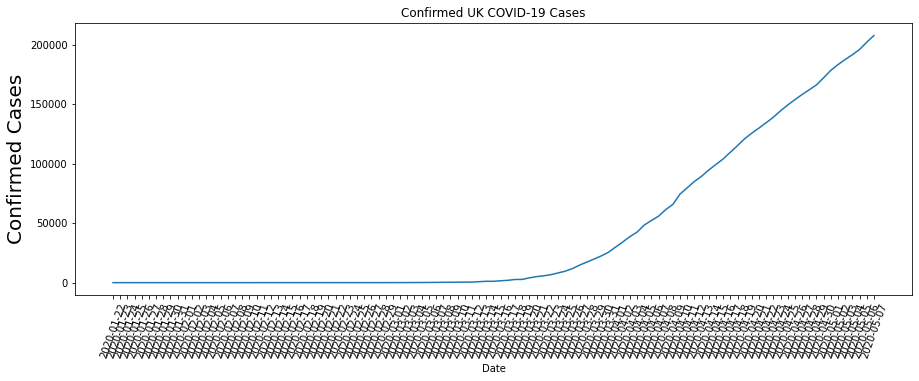

In [0]:
plt.figure(figsize=(15,5)) # manually make the canvas size wider
plt.plot(uk_cases)
plt.xticks(uk_cases.index, rotation = 70) # the default behaviour was to detect the index of the uk_cases series
# Here, we manually give the plt.xticks() function the index, but also the extra rotation=x parameter, to rotate the dates

plt.xlabel('Date') # always label your axes! 
plt.ylabel('Confirmed Cases', fontsize = 20) # add keyword arguments for extra features, see documentation
plt.title('Confirmed UK COVID-19 Cases')
plt.show()

# Multiple Lines, one plot

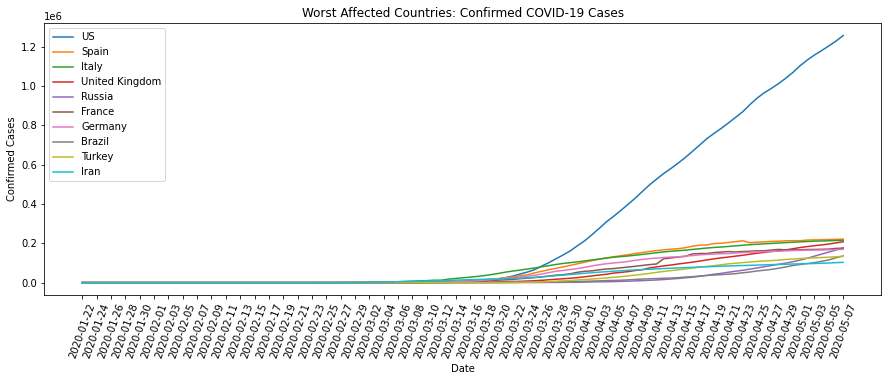

In [0]:
# worse affected countries
worst_affected =  confirmed.iloc[:,-1].nlargest(10) # .iloc[:,-1] is the index lookup method, which lets you 
# find a column or row based on its position, instead of its name. [:,-1] means all rows, last column (most recent)
# nlargest(10) selects the 10 largest confirmed cases

plt.figure(figsize=(15,5)) 

for i in worst_affected.index:
    # for every country in the confirmed sheet
    cases = confirmed.loc[i,:]
    plt.plot(cases) # overlay the plots!

# Only need to add these touch ups once
plt.xticks(confirmed.columns[::2], rotation = 70)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases') 
plt.title('Worst Affected Countries: Confirmed COVID-19 Cases')
plt.legend(worst_affected.index)

#plt.yscale('log') #try uncommenting this command for a log scale
plt.show()